<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_03_Comuter_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-03 09:18:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.7MB/s    in 5.6s    

2023-05-03 09:18:56 (18.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the Downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


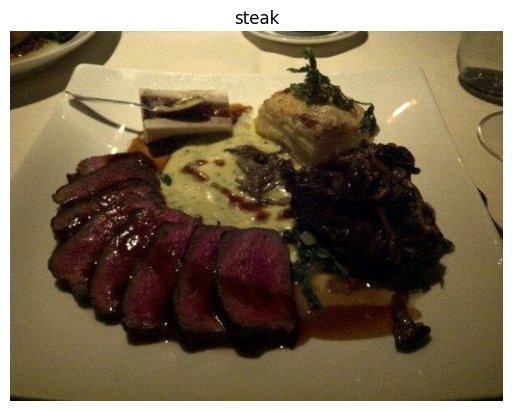

In [9]:


# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[ 79,  48,  30],
        [ 53,  22,   4],
        [ 60,  29,   9],
        ...,
        [104,  89,  48],
        [107,  92,  51],
        [108,  93,  52]],

       [[ 58,  27,   9],
        [ 65,  34,  16],
        [ 74,  43,  23],
        ...,
        [103,  88,  47],
        [104,  89,  48],
        [105,  90,  49]],

       [[ 47,  16,   0],
        [ 70,  39,  21],
        [ 65,  34,  14],
        ...,
        [106,  91,  50],
        [105,  90,  49],
        [105,  90,  49]],

       ...,

       [[ 25,  11,   2],
        [ 25,  11,   2],
        [ 25,  11,   2],
        ...,
        [  9,   9,   0],
        [  9,   9,   0],
        [  8,   8,   0]],

       [[ 23,  10,   2],
        [ 22,   9,   1],
        [ 21,   8,   0],
        ...,
        [  7,   9,   0],
        [  7,   8,   0],
        [  7,   8,   0]],

       [[ 19,   6,   0],
        [ 18,   5,   0],
        [ 17,   4,   0],
        ...,
        [  4,   5,   0],
        [  7,   8,   0],
        [ 11,  12,   4]]

In [11]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.30980392, 0.18823529, 0.11764706],
        [0.20784314, 0.08627451, 0.01568627],
        [0.23529412, 0.11372549, 0.03529412],
        ...,
        [0.40784314, 0.34901961, 0.18823529],
        [0.41960784, 0.36078431, 0.2       ],
        [0.42352941, 0.36470588, 0.20392157]],

       [[0.22745098, 0.10588235, 0.03529412],
        [0.25490196, 0.13333333, 0.0627451 ],
        [0.29019608, 0.16862745, 0.09019608],
        ...,
        [0.40392157, 0.34509804, 0.18431373],
        [0.40784314, 0.34901961, 0.18823529],
        [0.41176471, 0.35294118, 0.19215686]],

       [[0.18431373, 0.0627451 , 0.        ],
        [0.2745098 , 0.15294118, 0.08235294],
        [0.25490196, 0.13333333, 0.05490196],
        ...,
        [0.41568627, 0.35686275, 0.19607843],
        [0.41176471, 0.35294118, 0.19215686],
        [0.41176471, 0.35294118, 0.19215686]],

       ...,

       [[0.09803922, 0.04313725, 0.00784314],
        [0.09803922, 0.04313725, 0.00784314],
        [0.09803922, 0

## An end to end example
Let's build an End to end Neural Network
* Load our images
* preprocess
* Build CNN to find patterns
* Compile the CNN
* Fit the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (Get all the pixel values to be between 0 &1, also called normalization)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 350ms/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.4312 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4326 - accuracy: 0.8153 - val_loss: 0.4252 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4240 - accuracy: 0.8193 - val_loss: 0.4020 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3746 - accuracy: 0.8400 - val_loss: 0.3184 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3384 - accuracy: 0.8687 - val_loss: 0.2944 - val_accuracy: 0.8880
